```DBSCAN ``` - Density based spatial clustering of applications with noise

- outliers(noise) part of the data but are not included in clusters
- to make the data more efficient 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [70]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
X  = df.iloc[:, [3, 4]].values


In [72]:
X = StandardScaler().fit_transform(X)

- eps - Neighbourhood Radius : How close two points must be to be in teh same cluster 
- min_samples - Minimum points in a cluster : The minimum number of points needed to form a cluster 

In [73]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

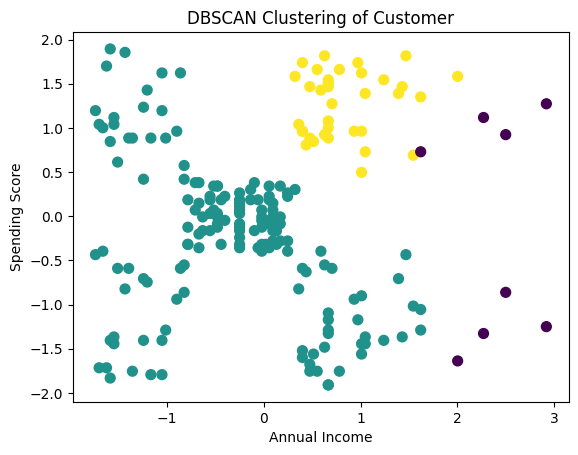

In [74]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [75]:
# finding outliers 
outliers = X[labels == -1]
print(f"total Outliers detected: {len(outliers)}")

total Outliers detected: 8


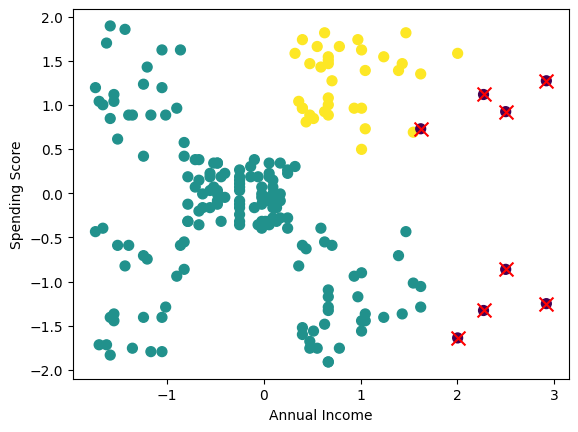

In [76]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.scatter(outliers[:,0], outliers[:,1], c='red', s=100, label='Outliers',marker='x')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

calculate silhouette score

In [77]:
from sklearn.metrics import silhouette_score

In [78]:
score = silhouette_score(X,labels)
print("Silhouette Score:", score)

Silhouette Score: 0.35044619989666004
